### 0. Load Libraries

In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import re

/Users/saitejas/Desktop/root/cyber_bullying/EDA/EDA-ENV/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1(a). Importing Dataset (huggin face)

In [3]:
dataset = load_dataset("AnikaBasu/CyberbullyingDataset")
df = dataset['train'].to_pandas()
df.head()

,input,text,instruction,output
0,,Here is a classification that determines wheth...,"In other words #katandandre, your food was cra...",not_cyberbullying
1,,Here is a classification that determines wheth...,"In other words #katandandre, your food was cra...",not_cyberbullying
2,,Here is a classification that determines wheth...,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
3,,Here is a classification that determines wheth...,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
4,,Here is a classification that determines wheth...,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying


### 1(b). Importing data from local downloaded JSON file from Huggin Face

In [4]:
file_path = '/Users/saitejas/Desktop/root/cyber_bullying/Datasets/hugginface/datasets--AnikaBasu--CyberbullyingDataset/snapshots/3d59360b6f51c4fae8f96de2f5451074db56c874/ParsedAnikaBCyberbullyingDataset.json'
df = pd.read_json(file_path)
df.head()

,text,output,instruction,input
0,Here is a classification that determines wheth...,not_cyberbullying,"In other words #katandandre, your food was cra...",
1,Here is a classification that determines wheth...,not_cyberbullying,"In other words #katandandre, your food was cra...",
2,Here is a classification that determines wheth...,not_cyberbullying,Why is #aussietv so white? #MKR #theblock #ImA...,
3,Here is a classification that determines wheth...,not_cyberbullying,@XochitlSuckkks a classy whore? Or more red ve...,
4,Here is a classification that determines wheth...,not_cyberbullying,"@Jason_Gio meh. :P thanks for the heads up, b...",


### 2. EDA

In [5]:
#Clean data for analysing

In [10]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saitejas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/saitejas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [50]:
def clean_data(df):
    text_data = ' '.join(df['instruction'].astype(str).tolist())
    text_data = re.sub(r'http[s]?://\S+|www\.\S+', '', text_data)
    text_data = re.sub(r'@\w+', '', text_data)
    text_data = re.sub(r'\bRT\b', '', text_data)
    tokens = word_tokenize(text_data)
    tokens = [word.lower() for word in tokens]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return Counter(filtered_tokens)

In [37]:
# Plotting the word cloud for analysis
def word_cloud(word_freq, key):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Frequent Terms Associated with '+key)
    plt.show()

In [44]:
#Plotting bar chart for analysis
def bar_char(word_freq, key):
    most_common_words = word_freq.most_common(20)
    words, counts = zip(*most_common_words)
    
    plt.figure(figsize=(12, 8))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top 20 Most Frequent Words Associated with {key} Bullying')
    plt.gca().invert_yaxis()
    plt.show()

In [67]:
df_not_bullying = df[df['output'] == "not_cyberbullying"]
df_gender_bullying = df[df['output'] == "gender"]
df_religion_bullying = df[df['output'] == "religion"]
df_age_bullying = df[df['output'] == "age"]
df_ethnicity_bullying = df[df['output'] == "ethnicity"]
df_other_bullying = df[df['output'] == "other_cyberbullying"]

In [68]:
#Data analysis for Gender bullying

In [69]:
word_freq = clean_data(df_gender_bullying)

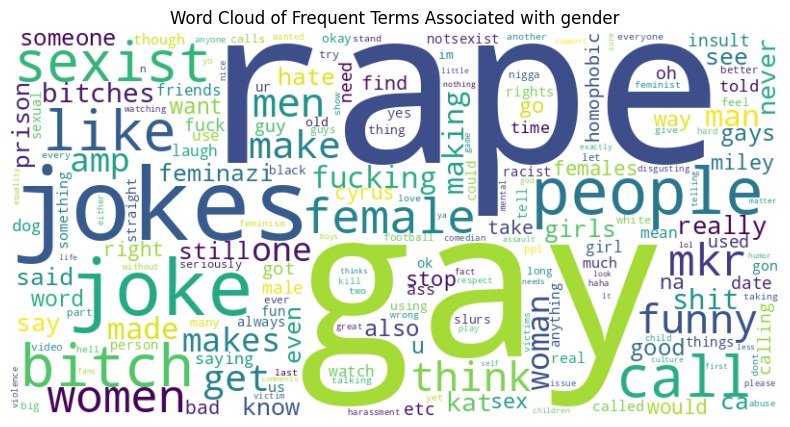

In [70]:
word_cloud(word_freq, key="gender")

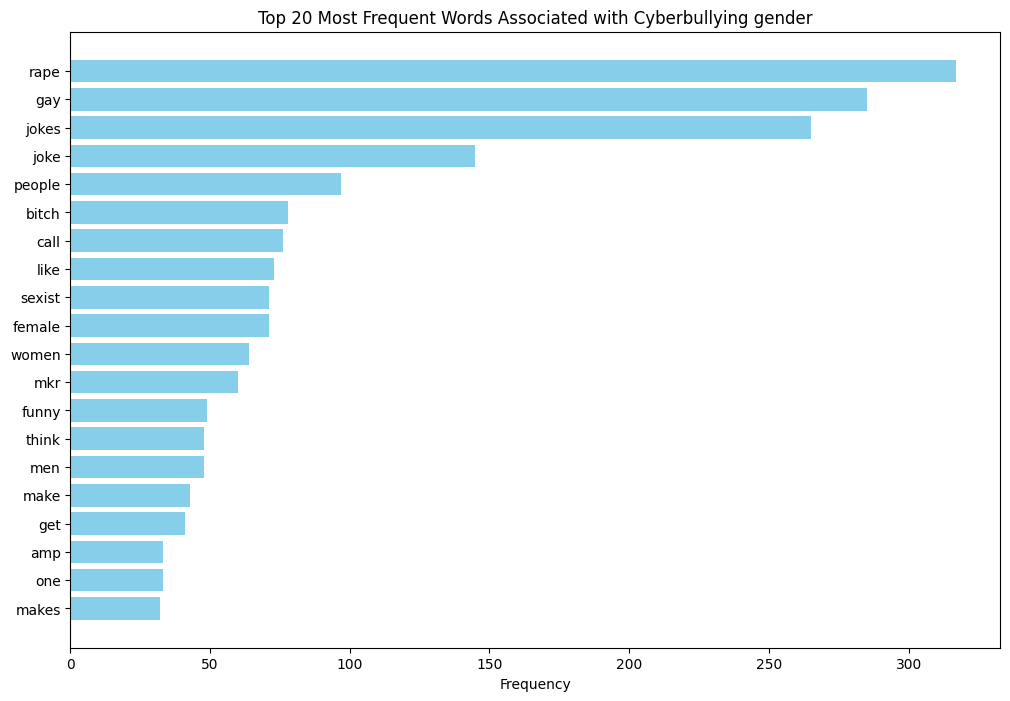

In [71]:
bar_char(word_freq, key="gender")

In [ ]:
#Data analysis for age bullying

In [56]:
word_freq = clean_data(df_age_bullying)

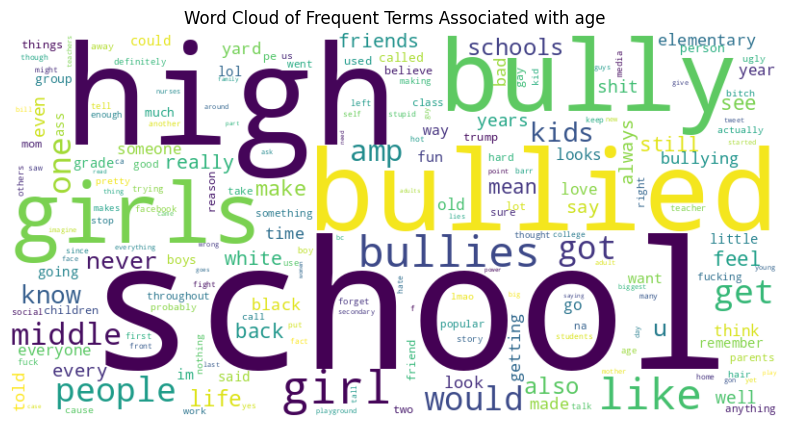

In [57]:
word_cloud(word_freq, key="age")

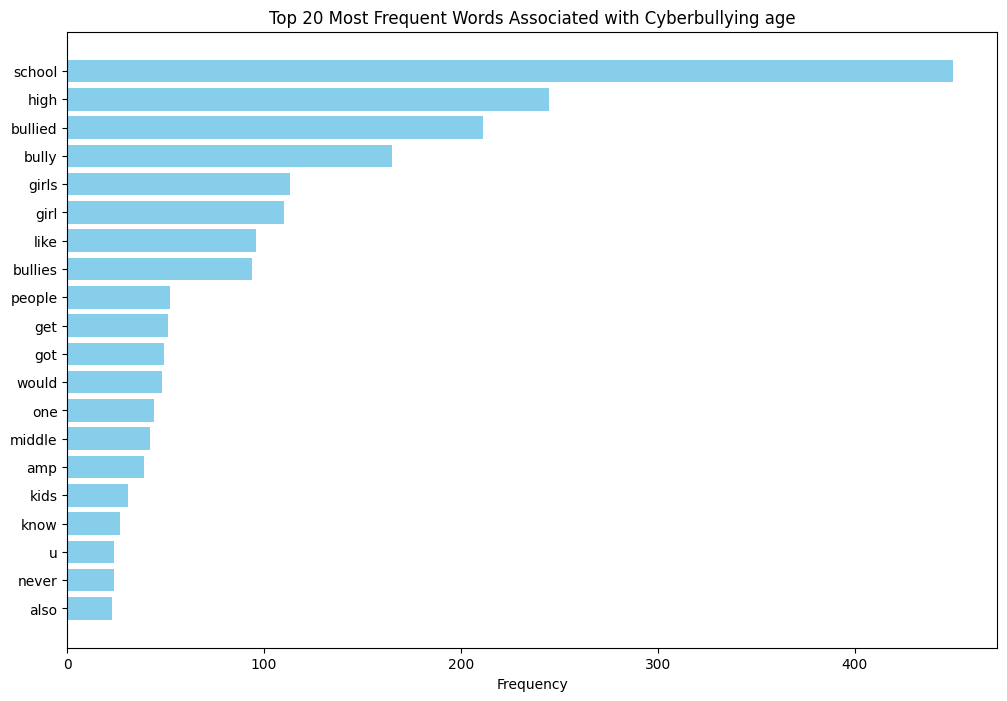

In [58]:
bar_char(word_freq, key="age")

In [59]:
#Data analysis for religion bullying

In [60]:
word_freq = clean_data(df_religion_bullying)

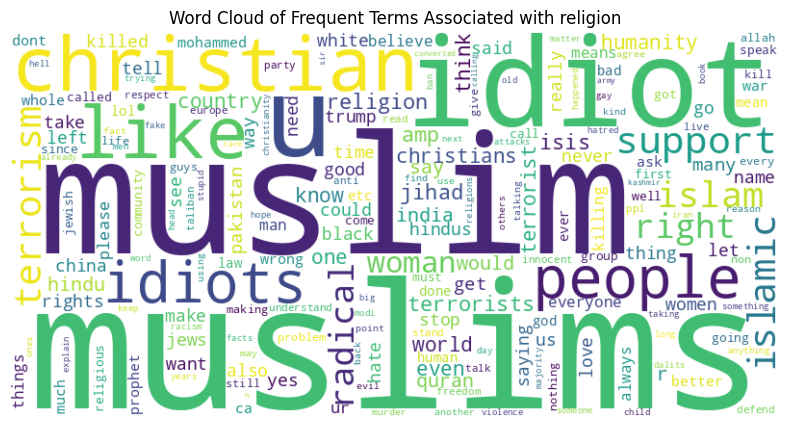

In [61]:
word_cloud(word_freq, key="religion")

In [62]:
#Data analysis for ethnicity bullying

In [63]:
word_freq = clean_data(df_ethnicity_bullying)

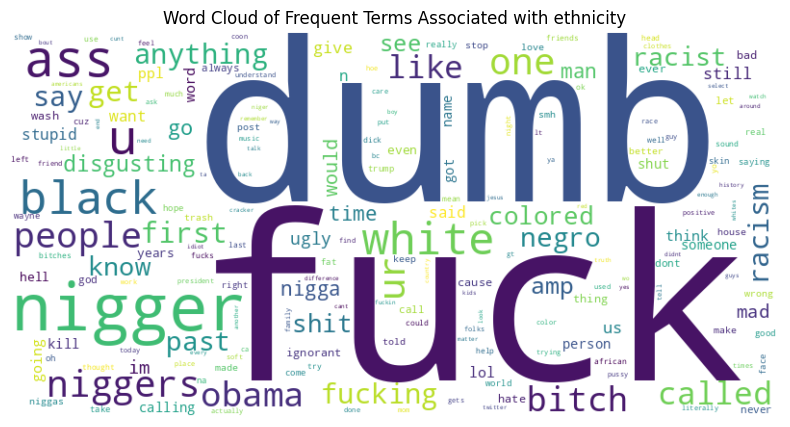

In [64]:
word_cloud(word_freq, key="ethnicity")

In [65]:
#Data analysis for other bullying

In [72]:
word_freq = clean_data(df_other_bullying)

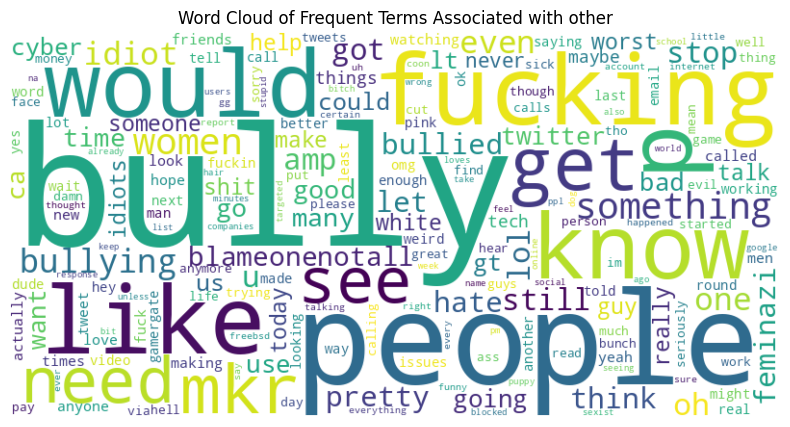

In [73]:
word_cloud(word_freq, key="other")

In [74]:
#Data analysis for not bullying

In [75]:
word_freq = clean_data(df_not_bullying)

In [ ]:
word_cloud(word_freq, key="not")